----------

### Importing necessarily libraries

In [ ]:
from pandas import read_csv
from pandas import concat
from pandas import get_dummies
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report

### Importing dataset

In [ ]:

data = read_csv("/content/drive/My Drive/DelayedFlights.csv")
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Mounting ggogle drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data preprocessing and splitting into X and Y (features and targets)

In [ ]:
data = data.drop("Unnamed: 0",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
target = ["Cancelled"]
leaky_features = ["Year", "Diverted", "ArrTime", "ActualElapsedTime", "AirTime", "ActualElapsedTime", "AirTime", "ArrDelay", "TaxiIn", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay", "CancellationCode"]
features = [x for x in data.columns if (x != target[0]) & (x not in leaky_features) & (len(data[x].unique().tolist()) > 1)]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
where = data["Month"].isin([10,11,12])
data = data[where]

----------

In [ ]:
def get_dtypes(data,features):
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

In [ ]:
dtypes = get_dtypes(data,features)

In [ ]:
categories = ["Month", "DayOfWeek", "DayofMonth"]
categories += dtypes["object"]
numerics = [i for i in dtypes["int64"] if i not in categories]
numerics += dtypes["float64"]

In [ ]:
data[categories].head()

,Month,DayOfWeek,DayofMonth,UniqueCarrier,TailNum,Origin,Dest
1524285,10,5,3,WN,N523SW,HOU,DEN
1524286,10,5,3,WN,N657SW,HOU,FLL
1524287,10,5,3,WN,N607SW,HOU,HRL
1524288,10,5,3,WN,N734SA,HOU,HRL
1524289,10,5,3,WN,N266WN,HOU,JAN


In [ ]:
data[numerics].head()

,CRSDepTime,CRSArrTime,FlightNum,Distance,DepTime,CRSElapsedTime,DepDelay,TaxiOut
1524285,1730,1905,2155,883,1742.0,155.0,12.0,13.0
1524286,1900,2220,45,957,1906.0,140.0,6.0,5.0
1524287,1550,1650,33,276,1602.0,60.0,12.0,9.0
1524288,2120,2215,55,276,2148.0,55.0,28.0,9.0
1524289,2130,2235,1079,359,2149.0,65.0,19.0,7.0


In [ ]:
for numeric in numerics: data[numeric] = data[numeric].fillna(0)

In [ ]:
categories.remove("TailNum")

----------

In [ ]:
cancelled = data[data[target[0]] == 1]
not_cancelled = data[data[target[0]] == 0]

In [ ]:
from pandas import concat

data = concat([cancelled, not_cancelled.sample(n=len(cancelled))],0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from pandas import get_dummies

one_hot_encoded = get_dummies(data[categories].fillna("Unknown"))
X = concat([one_hot_encoded, data[numerics].fillna(0)],1)
y = data[target[0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Applying machine learning algorithms and thier respective confusion matrix

Accuracy: 0.8420221169036335


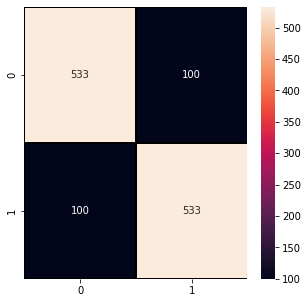

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       633
           1       0.84      0.84      0.84       633

    accuracy                           0.84      1266
   macro avg       0.84      0.84      0.84      1266
weighted avg       0.84      0.84      0.84      1266



In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc.fit(X,y)
print("Accuracy:" , rfc.score(X, y))

y_pred = rfc.predict(X)
y_true = y
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax) 
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Accuracy: 0.9423380726698263


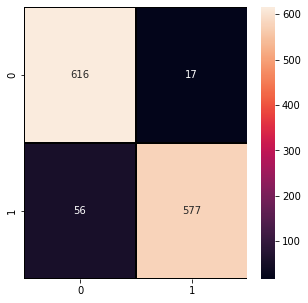

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       633
           1       0.97      0.91      0.94       633

    accuracy                           0.94      1266
   macro avg       0.94      0.94      0.94      1266
weighted avg       0.94      0.94      0.94      1266



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 0)
ada.fit(X, y)
print("Accuracy:", ada.score(X, y))

y_pred = ada.predict(X)
y_true = y
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Accuracy: 0.9470774091627172


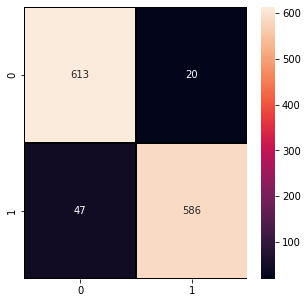

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       633
           1       0.97      0.93      0.95       633

    accuracy                           0.95      1266
   macro avg       0.95      0.95      0.95      1266
weighted avg       0.95      0.95      0.95      1266



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)
gbc.fit(X, y)
print("Accuracy:" , gbc.score(X, y))

y_pred = gbc.predict(X)
y_true = y
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax)
plt.show()

from sklearn.metrics import classification_report 
print(classification_report(y_true, y_pred))

Accuracy: 1.0


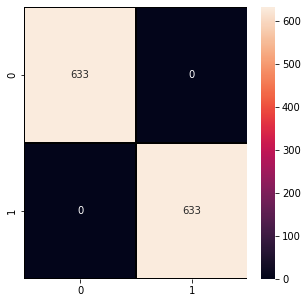

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       633
           1       1.00      1.00      1.00       633

    accuracy                           1.00      1266
   macro avg       1.00      1.00      1.00      1266
weighted avg       1.00      1.00      1.00      1266



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 100, random_state = 0)
etc.fit(X, y)
print("Accuracy:" , etc.score(X, y))

y_pred = etc.predict(X)
y_true = y
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax)
plt.show()

from sklearn.metrics import classification_report 
print(classification_report(y_true, y_pred))

In [ ]:
!pip install xgboost==0.6a2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
ERROR: Could not find a version that satisfies the requirement xgboost==0.6a2 (from versions: 0.4a12, 0.4a13, 0.4a14, 0.4a15, 0.4a18, 0.4a19, 0.4a20, 0.4a21, 0.4a22, 0.4a23, 0.4a24, 0.4a25, 0.4a26, 0.4a27, 0.4a28, 0.4a29, 0.4a30, 0.6a1, 0.6a2, 0.7.post3, 0.7.post4, 0.71, 0.72.1, 0.80, 0.81, 0.82, 0.90, 1.0.0rc1, 1.0.0rc2, 1.0.0, 1.0.1, 1.0.2, 1.1.0rc1, 1.1.0rc2, 1.1.0, 1.1.1, 1.2.0rc1, 1.2.0rc2, 1.2.0, 1.2.1rc1, 1.2.1, 1.3.0rc1, 1.3.0.post0, 1.3.1, 1.3.2, 1.3.3, 1.4.0rc1, 1.4.0, 1.4.1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2, 1.6.0rc1, 1.6.0, 1.6.1)
ERROR: No matching distribution found for xgboost==0.6a2


Accuracy: 0.9265402843601895


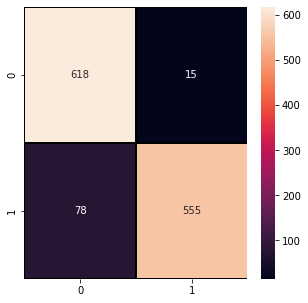

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       633
           1       0.97      0.88      0.92       633

    accuracy                           0.93      1266
   macro avg       0.93      0.93      0.93      1266
weighted avg       0.93      0.93      0.93      1266



In [ ]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(n_estimators = 100, random_state = 0)
xgb.fit(X, y)
print("Accuracy:" , xgb.score(X, y))

y_pred = xgb.predict(X)
y_true = y
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
import seaborn as sns 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "Black", fmt = ".0f", ax = ax)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))